<a href="https://colab.research.google.com/github/AdityaGitHubPro/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**

### **Analyzing and Knowing the Data Set**

# **Visualizing the Data**

## **importing libraries**

In [ ]:
import numpy as np                              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading and Reading the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Set Of Machine Learning/Customer Segmentation.csv")
df.head
df.info
df.tail

<bound method NDFrame.tail of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# **Gender Distribution Between Males and Females**

In [ ]:
genders=df.Gender.value_counts()

In [ ]:
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

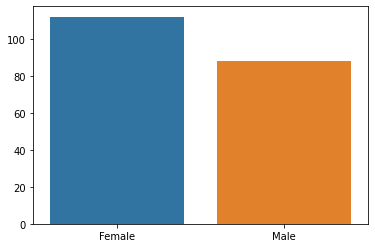

In [ ]:
sns.barplot(x=genders.index , y=genders.values)

## **Visualized the different Customers with age groups**

In [ ]:
age18_25 = df.Age[(df.Age<=25)&(df.Age>=18)]
age26_35 = df.Age[(df.Age<=35)&(df.Age>=26)]
age36_45 = df.Age[(df.Age<=45)&(df.Age>=36)]
age46_55 = df.Age[(df.Age<=55)&(df.Age>=46)]
age55above = df.Age[(df.Age>=56)]

In [ ]:
x=["18-25","26-35","36-45","46-55","Above55"]
y=[len(age18_25.values), len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

### **The graphical representation of ages and number of customers**


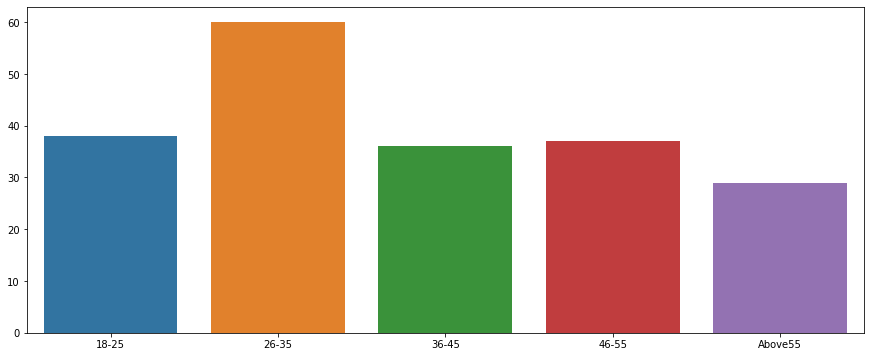

In [ ]:
plt.figure(figsize=(15,6))
plt.title=("Number of customers and ages")
plt.xlabel=("Ages")
plt.ylabel=("Number of customers")
sns.barplot(x=x,y=y)
plt.show()

## **Visualize the highest spending scores among the customers**

In [ ]:
ss1_20= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) &(df["Spending Score (1-100)"]<=20)]
ss21_40= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) &(df["Spending Score (1-100)"]<=40)]
ss41_60= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) &(df["Spending Score (1-100)"]<=60)]
ss61_80= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) &(df["Spending Score (1-100)"]<=80)]
ss81_100= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) &(df["Spending Score (1-100)"]<=100)]

In [ ]:
x=["1-20","21-40","41-60","61-80","81-100"]
y=[len(ss1_20.values), len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

### **the majority of spending scores among the customers is between 41-60**

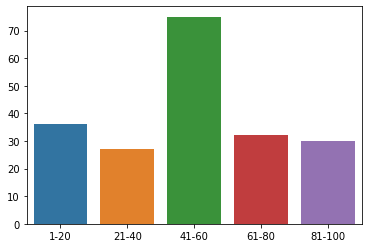

<Figure size 720x1440 with 0 Axes>

In [ ]:
sns.barplot(x=x , y=y)
plt.figure(figsize=(10,20))
plt.title=("Spending scores of the customers")
plt.xlabel=("Spending Scores")
plt.ylabel=("score of customers")
plt.show()

## **Visualize the annual income of the customers**
into groups from 0-30,31-60,61-90,91-120,121-150

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0)&(df["Annual Income (k$)"]<=30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)] 
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)] 
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)] 
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]

In [ ]:
x=["0-30","31-60", "61-90","91-120","121-150"]
y=[len(ai0_30.values), len(ai31_60.values), len(ai61_90.values),len(ai91_120.values), len(ai121_150.values)]

### **the majority of customers have the annual income between 61-90$**

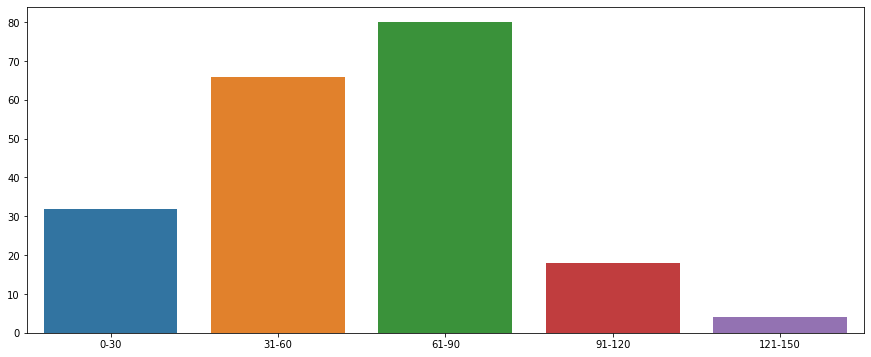

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,)
plt.title=("Annual Income of customers")
plt.xlabel=("Annual Income in k$")
plt.ylabel=("Number of customers")
plt.show()

## **Cluster the data by using the K- means algorithm**
**Code to find the line chart is**

In [ ]:
from sklearn.cluster import KMeans
wcss=[] #Within cluster sum of squares

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

ValueError: ignored

### **At point 5 there is a maximum inflection in the curve**
**Use 5 clusters in K means algorithm**

ValueError: ignored

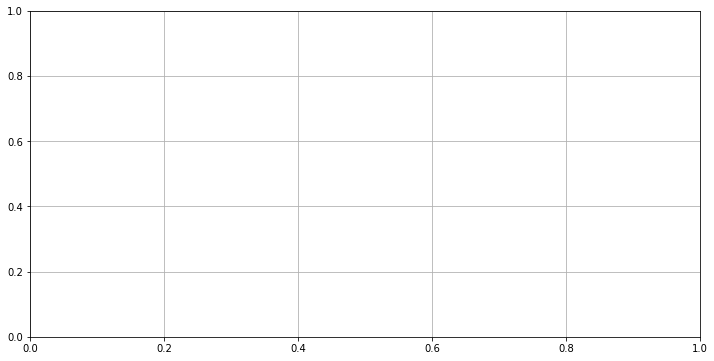

In [ ]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss)
plt.xlabel('KValue')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

# **KMeans Algorithm**
**HereEach customer represents one color customer1 as red, customer 2 as blue, customer3 as green, customer4 as orange, and customer5 as pink. The black dots represent the centroids of the cluster**

In [1]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit_predict(x)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c='red',label='customer1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c='blue',label='customer2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c='green',label='customer3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c='orange',label='customer4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c='pink',label='customer5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroids")
plt.title(str('cluster of customers'))
plt.xlabel(str('Annual Income'))
plt.ylabel(str('Spending Scores'))
plt.legend()
plt.show()

NameError: ignored

# **Summary of the Project**